In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os   

base_path = os.path.expanduser("~/Desktop") 
file_name = "Sleep_health_and_lifestyle_dataset.csv"
file_path = os.path.join(base_path, "dnz", "sleep-analysis", file_name)

df = pd.read_csv(file_path)

df.head()
df.set_index('Person ID', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.isnull().sum()
df.loc[:, 'Sleep Disorder'].fillna('None', inplace= True)

C:\Users\Eda\AppData\Local\Temp\ipykernel_17320\882933957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, 'Sleep Disorder'].fillna('None', inplace= True)


In [8]:
unique_list = [(f'{n}:, {df[n].unique()}') for n in df.columns]
unique_list

["Gender:, ['Male' 'Female']",
 'Age:, [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52\n 53 54 55 56 57 58 59]',
 "Occupation:, ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'\n 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']",
 'Sleep Duration:, [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1\n 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]',
 'Quality of Sleep:, [6 4 7 5 8 9]',
 'Physical Activity Level:, [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]',
 'Stress Level:, [6 8 7 4 3 5]',
 "BMI Category:, ['Overweight' 'Normal' 'Obese' 'Normal Weight']",
 "Blood Pressure:, ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'\n '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'\n '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'\n '118/75']",
 'Heart Rate:, [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]',
 'Daily Steps:, [ 4200

In [9]:
df.replace({'BMI Category':{'Normal Weight': 'Normal'}}, inplace= True) 

C:\Users\Eda\AppData\Local\Temp\ipykernel_17320\266237833.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Gender':{'Male': 0, 'Female': 1}, 'BMI Category':{'Normal': 0, 'Overweight': 1, 'Obese': 2}, 'Sleep Disorder':{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}}, inplace= True)


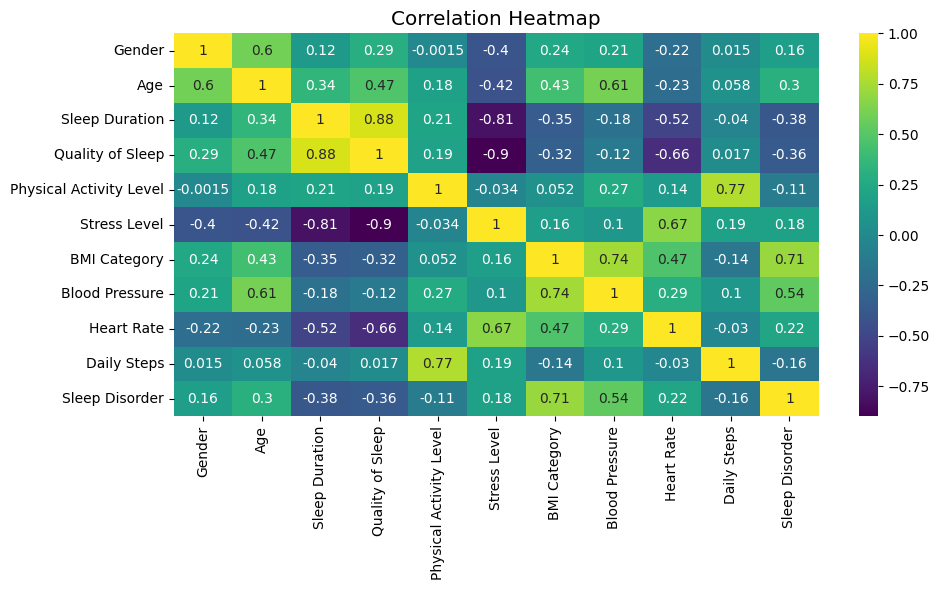

In [10]:
df2 = df.copy()
df2.replace({'Gender':{'Male': 0, 'Female': 1}, 'BMI Category':{'Normal': 0, 'Overweight': 1, 'Obese': 2}, 'Sleep Disorder':{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}}, inplace= True)
df2['Blood Pressure'] = df2['Blood Pressure'].str.split('/').str[0].astype(int)

dfint = df2.select_dtypes(include= ['int64', 'float64'])
fig, ax = plt.subplots(figsize= (10,6))
sns.heatmap(dfint.corr(), annot= True, cmap= 'viridis', ax=ax)
plt.style.use('ggplot')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('graphs/correlation_heatmap.png')
plt.show()

In [11]:
corr_matrix = dfint.corr()
conditions = ((corr_matrix > 0.65) | (corr_matrix < -0.65)) & (corr_matrix != 1.0)

strong_correlations = []
for i in range(len(corr_matrix.columns)):
   for j in range(i):
       if conditions.iloc[i,j]:
           strong_correlations.append((
               corr_matrix.index[i],
               corr_matrix.columns[j],
               corr_matrix.iloc[i,j]
           ))

for feat1, feat2, corr in strong_correlations:
   print(f"{feat1} -- {feat2}: {corr:.3f}")

Quality of Sleep -- Sleep Duration: 0.883
Stress Level -- Sleep Duration: -0.811
Stress Level -- Quality of Sleep: -0.899
Blood Pressure -- BMI Category: 0.740
Heart Rate -- Quality of Sleep: -0.660
Heart Rate -- Stress Level: 0.670
Daily Steps -- Physical Activity Level: 0.773
Sleep Disorder -- BMI Category: 0.708


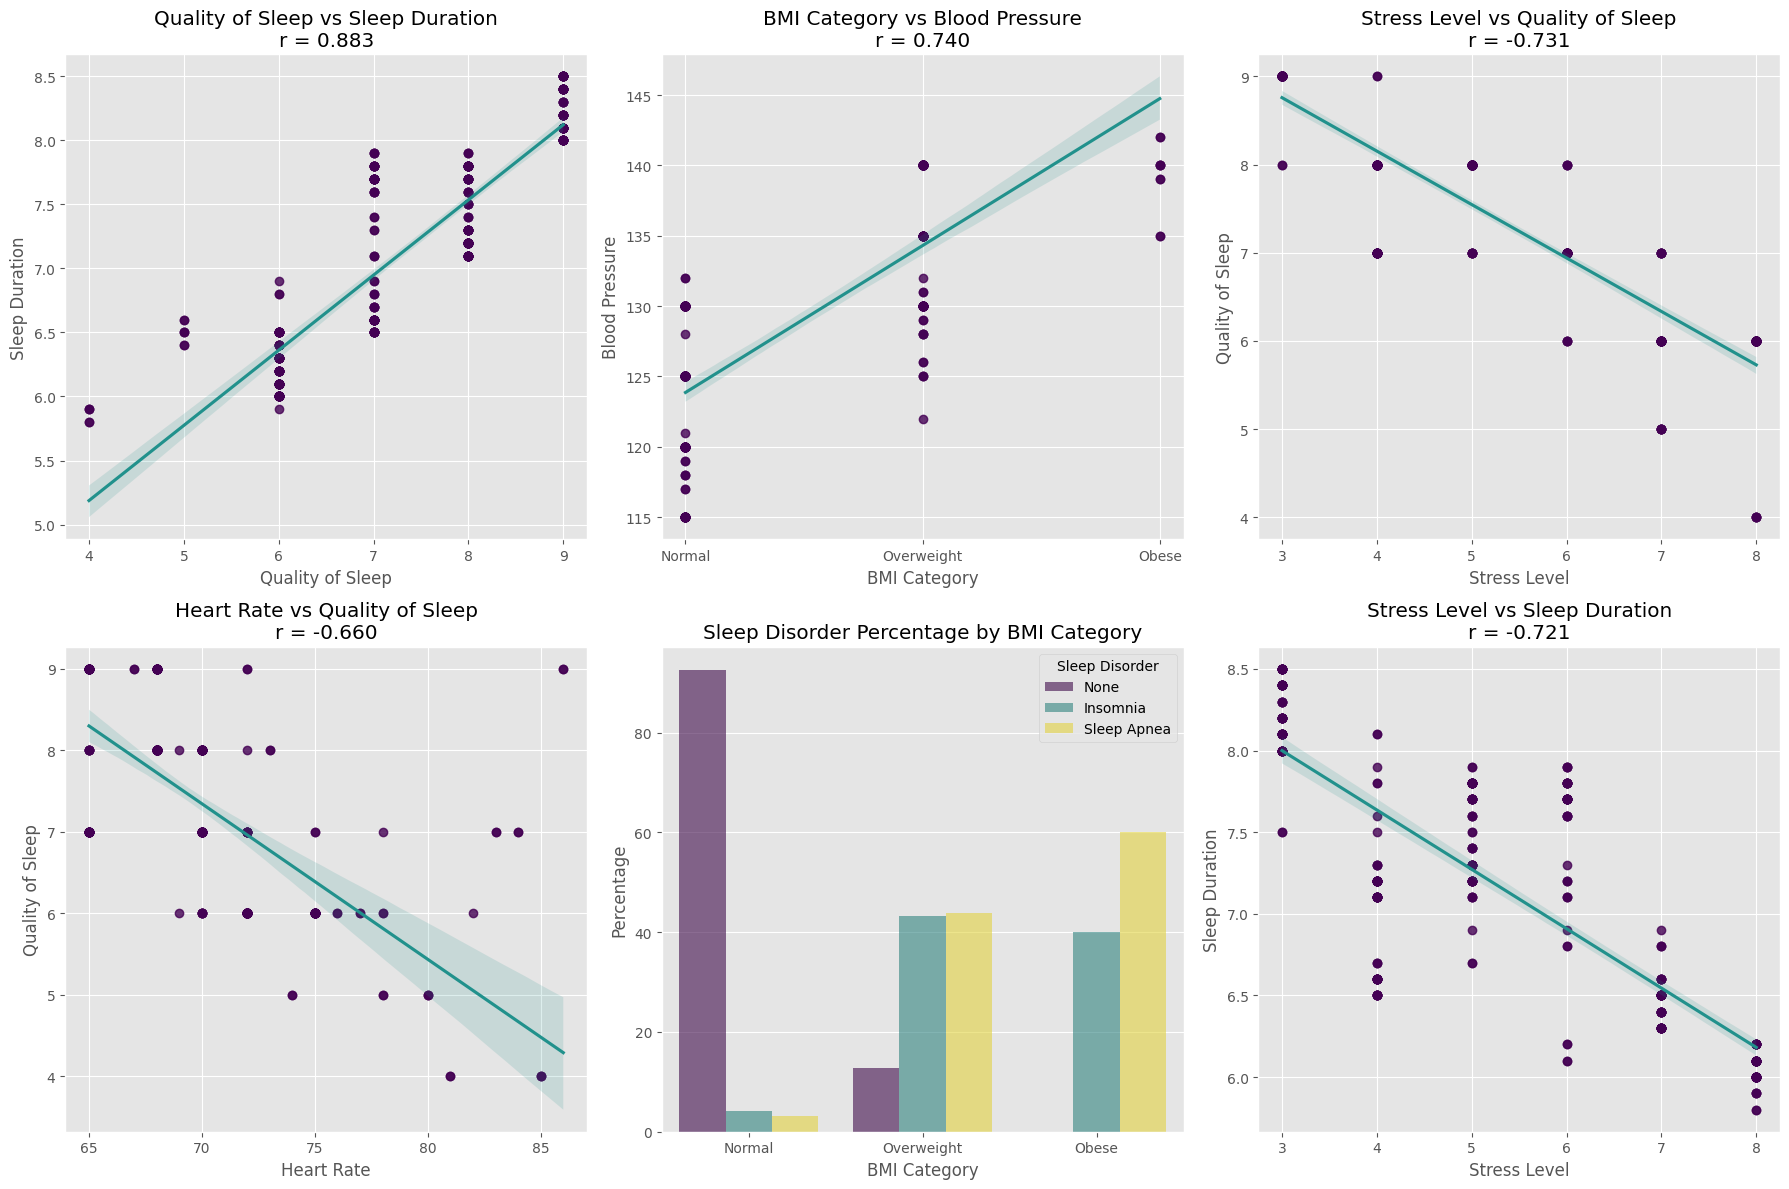

In [12]:
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
plt.style.use('ggplot')

# Plot 1: Quality of Sleep vs Sleep Duration
sns.regplot(data=dfint, x='Quality of Sleep', y='Sleep Duration', ax=ax1, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax1.set_title('Quality of Sleep vs Sleep Duration\nr = 0.883')

# Plot 2: Blood Pressure vs BMI Category 
sns.regplot(data=dfint, x='BMI Category', y='Blood Pressure', ax=ax2, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax2.set_title('BMI Category vs Blood Pressure\nr = 0.740')
ax2.set_xlabel('BMI Category')
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Normal', 'Overweight', 'Obese'])


# Plot 3: Daily Steps vs Physical Activity Level
sns.regplot(data=dfint, x='Heart Rate', y='Quality of Sleep', ax=ax3, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax3.set_title('Heart Rate vs Quality of Sleep\nr = -0.660')


# Plot 4: Sleep Disorder vs BMI Category
bmi_grouped = df.groupby('BMI Category')['Sleep Disorder'].value_counts().reset_index(name= 'Count')
count_bmi = bmi_grouped.groupby('BMI Category').sum()['Count']
bmi_grouped['Percentage'] = bmi_grouped.apply(lambda x: (x['Count'] / count_bmi[x['BMI Category']] * 100), axis=1)
bmi_order = ['Normal', 'Overweight', 'Obese']
bmi_grouped = bmi_grouped.sort_values('BMI Category', key=lambda x: pd.Categorical(x, categories=bmi_order))

sns.barplot(data=bmi_grouped, x='BMI Category', y='Percentage', hue='Sleep Disorder', ax=ax4, palette=['#440154', '#21918c', '#fde725'], alpha=0.6) 
ax4.set_title('Sleep Disorder Percentage by BMI Category')
ax4.set_ylabel('Percentage')
ax4.legend(title='Sleep Disorder') 

# Plot 5: Stress Level vs Quality of Sleep
sns.regplot(data=dfint, x='Stress Level', y='Quality of Sleep', ax=ax5, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax5.set_title('Stress Level vs Quality of Sleep\nr = -0.731')

# Plot 6: Stress Level vs Sleep Duration  
sns.regplot(data=dfint, x='Stress Level', y='Sleep Duration', ax=ax6, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax6.set_title('Stress Level vs Sleep Duration\nr = -0.721')

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/stress_level_vs_sleep_duration.png')
plt.show()

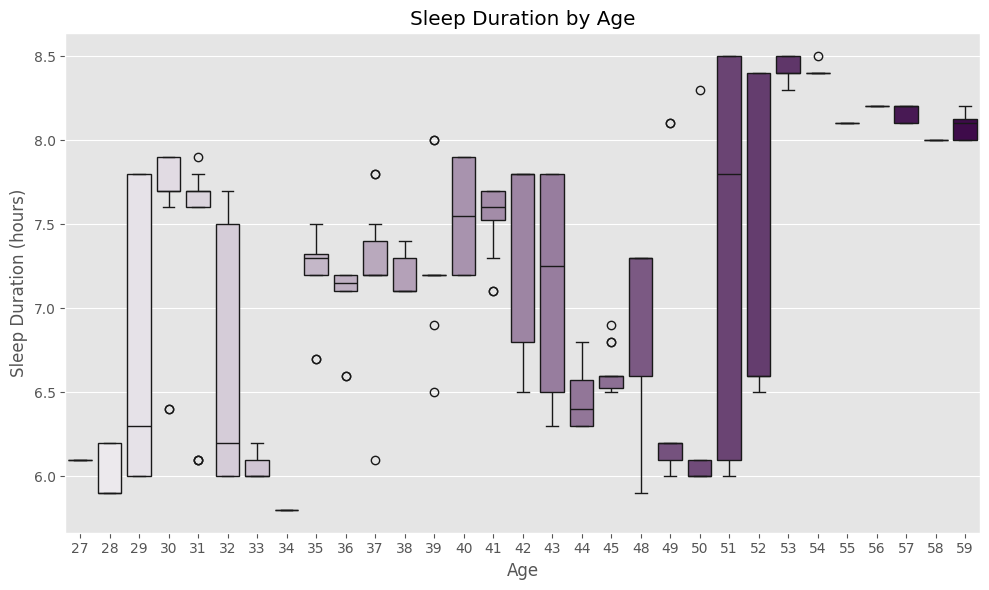

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data= df, x='Age', y='Sleep Duration', hue= 'Age', legend= False, palette='light:#440154')
plt.title('Sleep Duration by Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.savefig('graphs/sleep_duration_by_age.png')
plt.show()


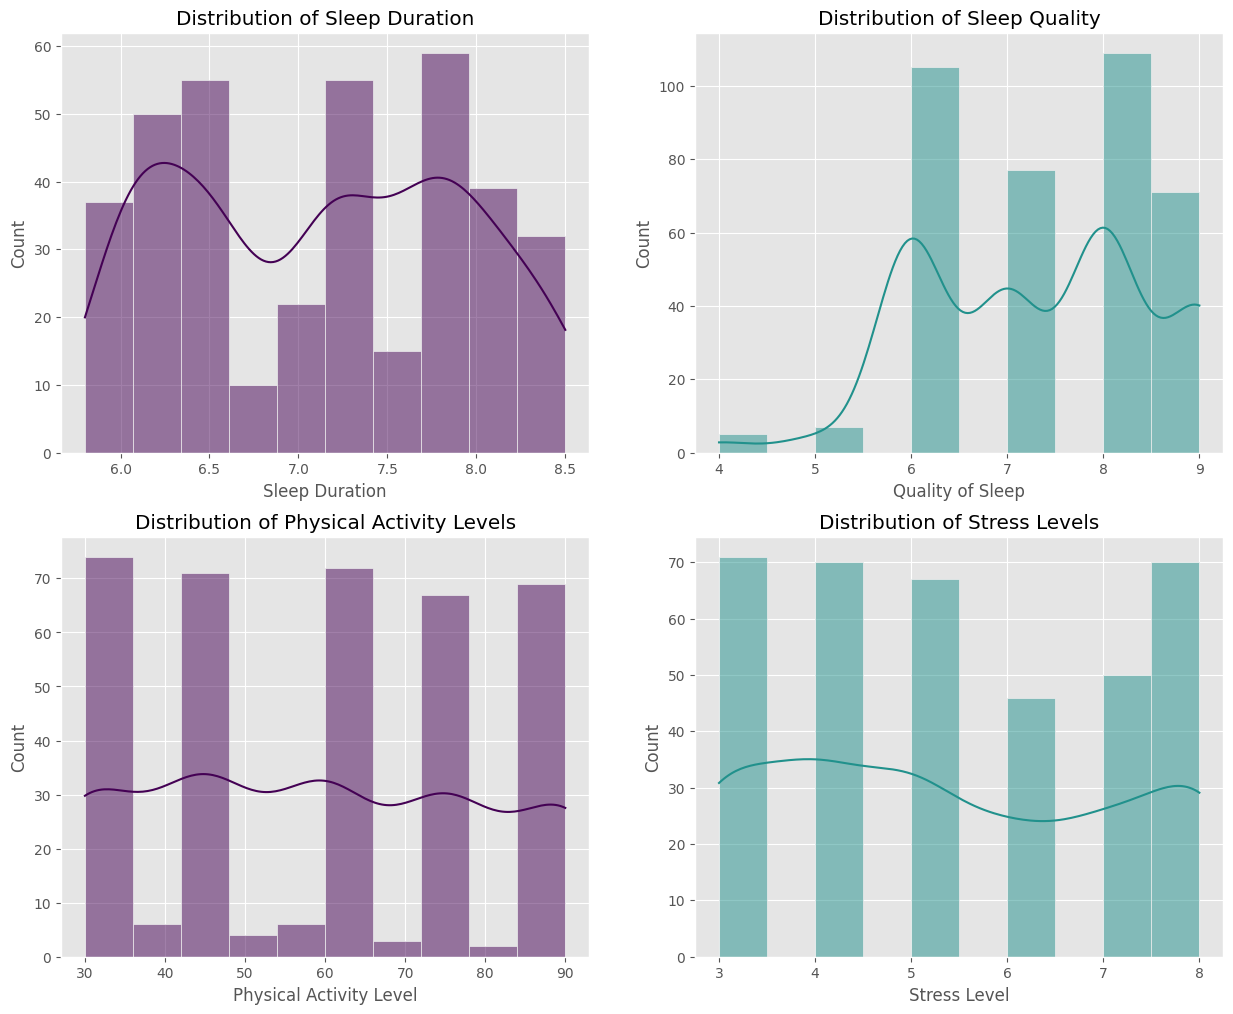

In [14]:
# Distribution plots for key metrics
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12))
plt.style.use('ggplot')

sns.histplot(data=df, x='Sleep Duration', kde=True, ax=ax1, color='#440154')
ax1.set_title('Distribution of Sleep Duration')

sns.histplot(data=df, x='Quality of Sleep', kde=True, ax=ax2, color='#21918c')
ax2.set_title('Distribution of Sleep Quality')

sns.histplot(data=df, x='Physical Activity Level', kde=True, ax=ax3, color='#440154')
ax3.set_title('Distribution of Physical Activity Levels')

sns.histplot(data=df, x='Stress Level', kde=True, ax=ax4, color='#21918c')
ax4.set_title('Distribution of Stress Levels')
plt.savefig('graphs/distribution_of_stress_levels.png')

<Figure size 1000x600 with 0 Axes>

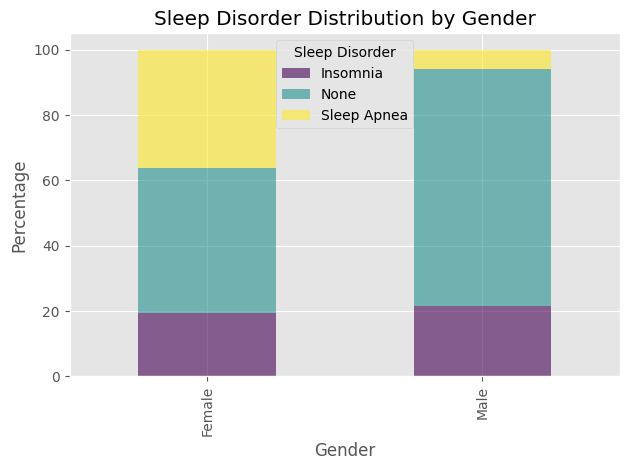

In [15]:
# Sleep disorder distribution by gender
plt.figure(figsize=(10,6))
disorder_by_gender = pd.crosstab(df['Gender'], df['Sleep Disorder'], normalize='index') * 100
disorder_by_gender.plot(kind='bar', stacked=True, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

plt.title('Sleep Disorder Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Sleep Disorder', loc='upper center')
plt.tight_layout()
plt.savefig('graphs/sleep_disorder_distribution_by_gender.png')
plt.show()

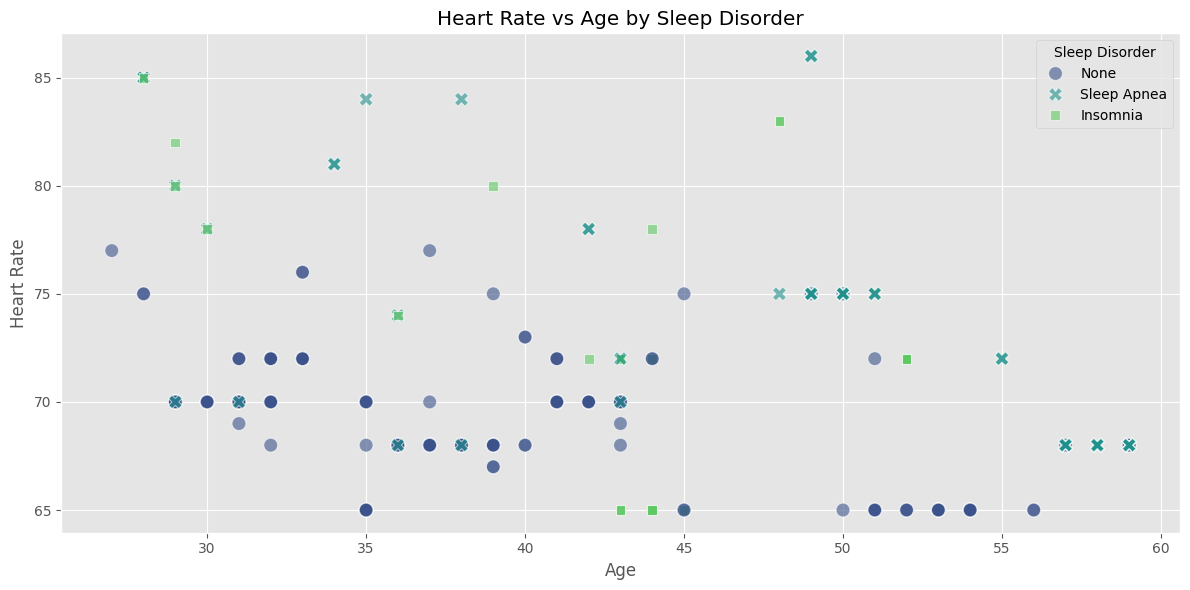

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Age', y='Heart Rate', hue='Sleep Disorder', style='Sleep Disorder', palette='viridis', alpha=0.6, s=100)
plt.title('Heart Rate vs Age by Sleep Disorder')
plt.tight_layout()
plt.savefig('graphs/heart_rate_vs_age_by_sleep_disorder.png')
plt.show()

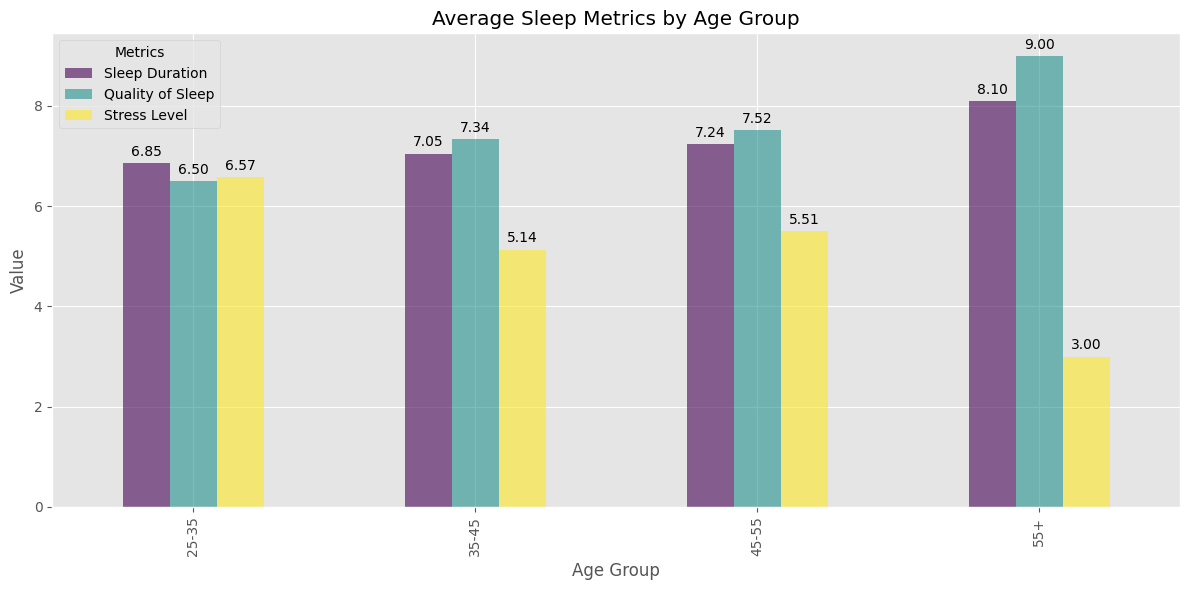

In [17]:
df['Age_Group'] = pd.cut(df['Age'], bins=[25,35,45,55,65], labels=['25-35','35-45','45-55','55+'])
age_metrics = df.groupby('Age_Group', observed= True)[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].mean()

fig, ax = plt.subplots(figsize=(12,6))
age_metrics.plot(kind='bar', ax=ax, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Average Sleep Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('graphs/average_sleep_metrics_by_age_group.png')
plt.show()

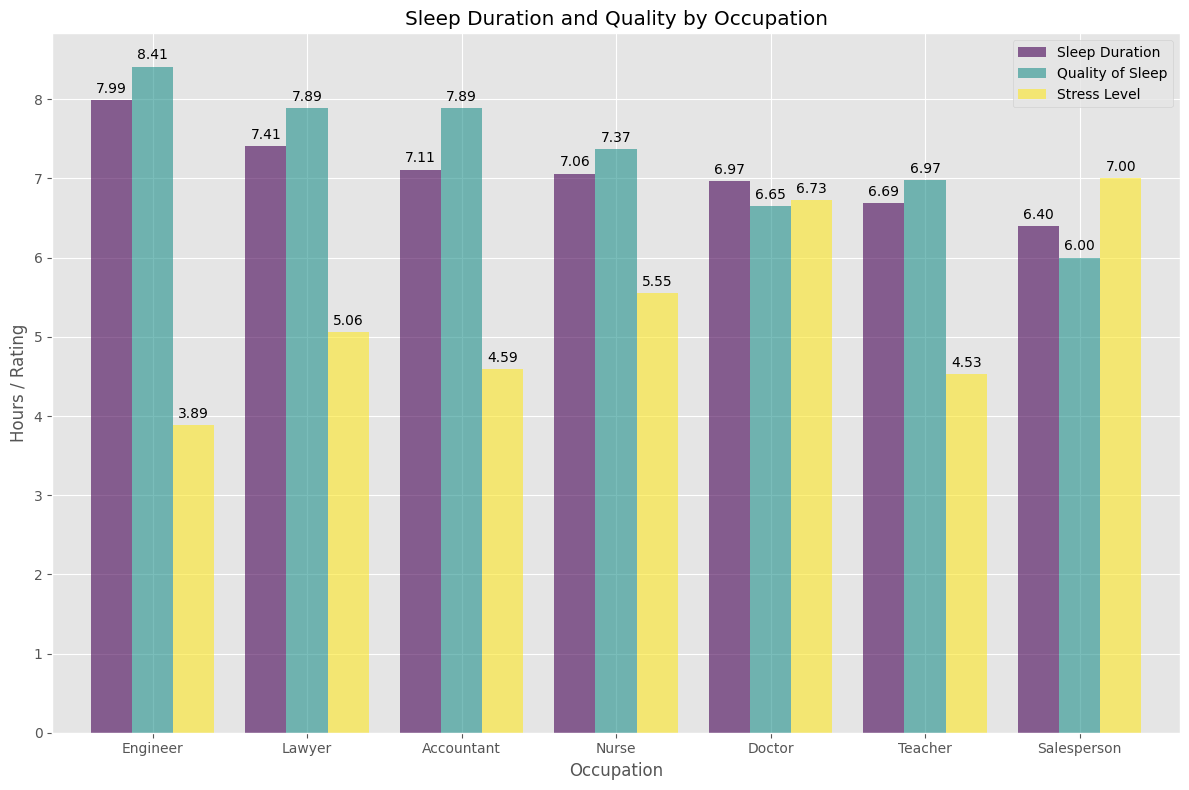

In [18]:
plt.style.use('ggplot')
top_occ = (df['Occupation'].value_counts() > (df.index.max() / 100) * 5)
top_occ = top_occ[top_occ == True].index
occ_sleep = df[df['Occupation'].isin(top_occ)].groupby('Occupation')[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].mean().sort_values(by='Sleep Duration', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
occ_sleep.plot(kind='bar', width=0.8, ax=ax, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

plt.title('Sleep Duration and Quality by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours / Rating')
plt.xticks(rotation=0)


for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('graphs/sleep_duration_and_quality_by_occupation.png')
plt.show()